In [140]:
import pandas as pd
bank = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


by looking at the data, experience has negative values which wont happen in reality. so data has to be cleaned.
approach used: see if the experience is negative and replace the negative valued experience based upon the age.

In [141]:
import math as math
def get_exp_based_on_age(age):
    for x in bank['Experience'].unique():
        if(x>=0 and age < 25):
            return 0   
            break    
        elif(x>=0 and age==math.floor(bank[bank['Experience']==x].Age.mean())):
            return x 
            #print(x)


In [142]:
#bank['Experience'].mask(bank['Experience']<0,pima_df.median(),axis=1)
for index, row in bank.iterrows():
    if(row['Experience']<0):
        #print(row['Experience'])
        bank.loc[index,'Experience']=get_exp_based_on_age(row['Age'])

In [143]:
for index, row in bank.iterrows():
    if(row['Experience']<0):
        print(index)

In [144]:
bank[bank.Experience.isna()==True]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [145]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [146]:
bank.describe()          

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.122800,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.435361,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


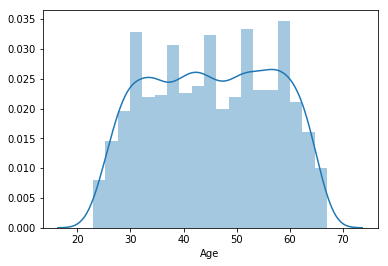

In [147]:
import seaborn as sns
sns.distplot(bank['Age'],kde=True)

In [148]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008109,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994235,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008109,0.994235,1.000000,-0.046849,-0.028630,-0.052348,-0.049962,0.013894,-0.010954,-0.007953,-0.001207,0.009979,0.013748,0.009041
Income,-0.017695,-0.055269,-0.046849,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028630,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052348,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049962,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013894,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010954,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007953,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Age and experience are highly correlated.
ccavg,mortgage are correlated with income

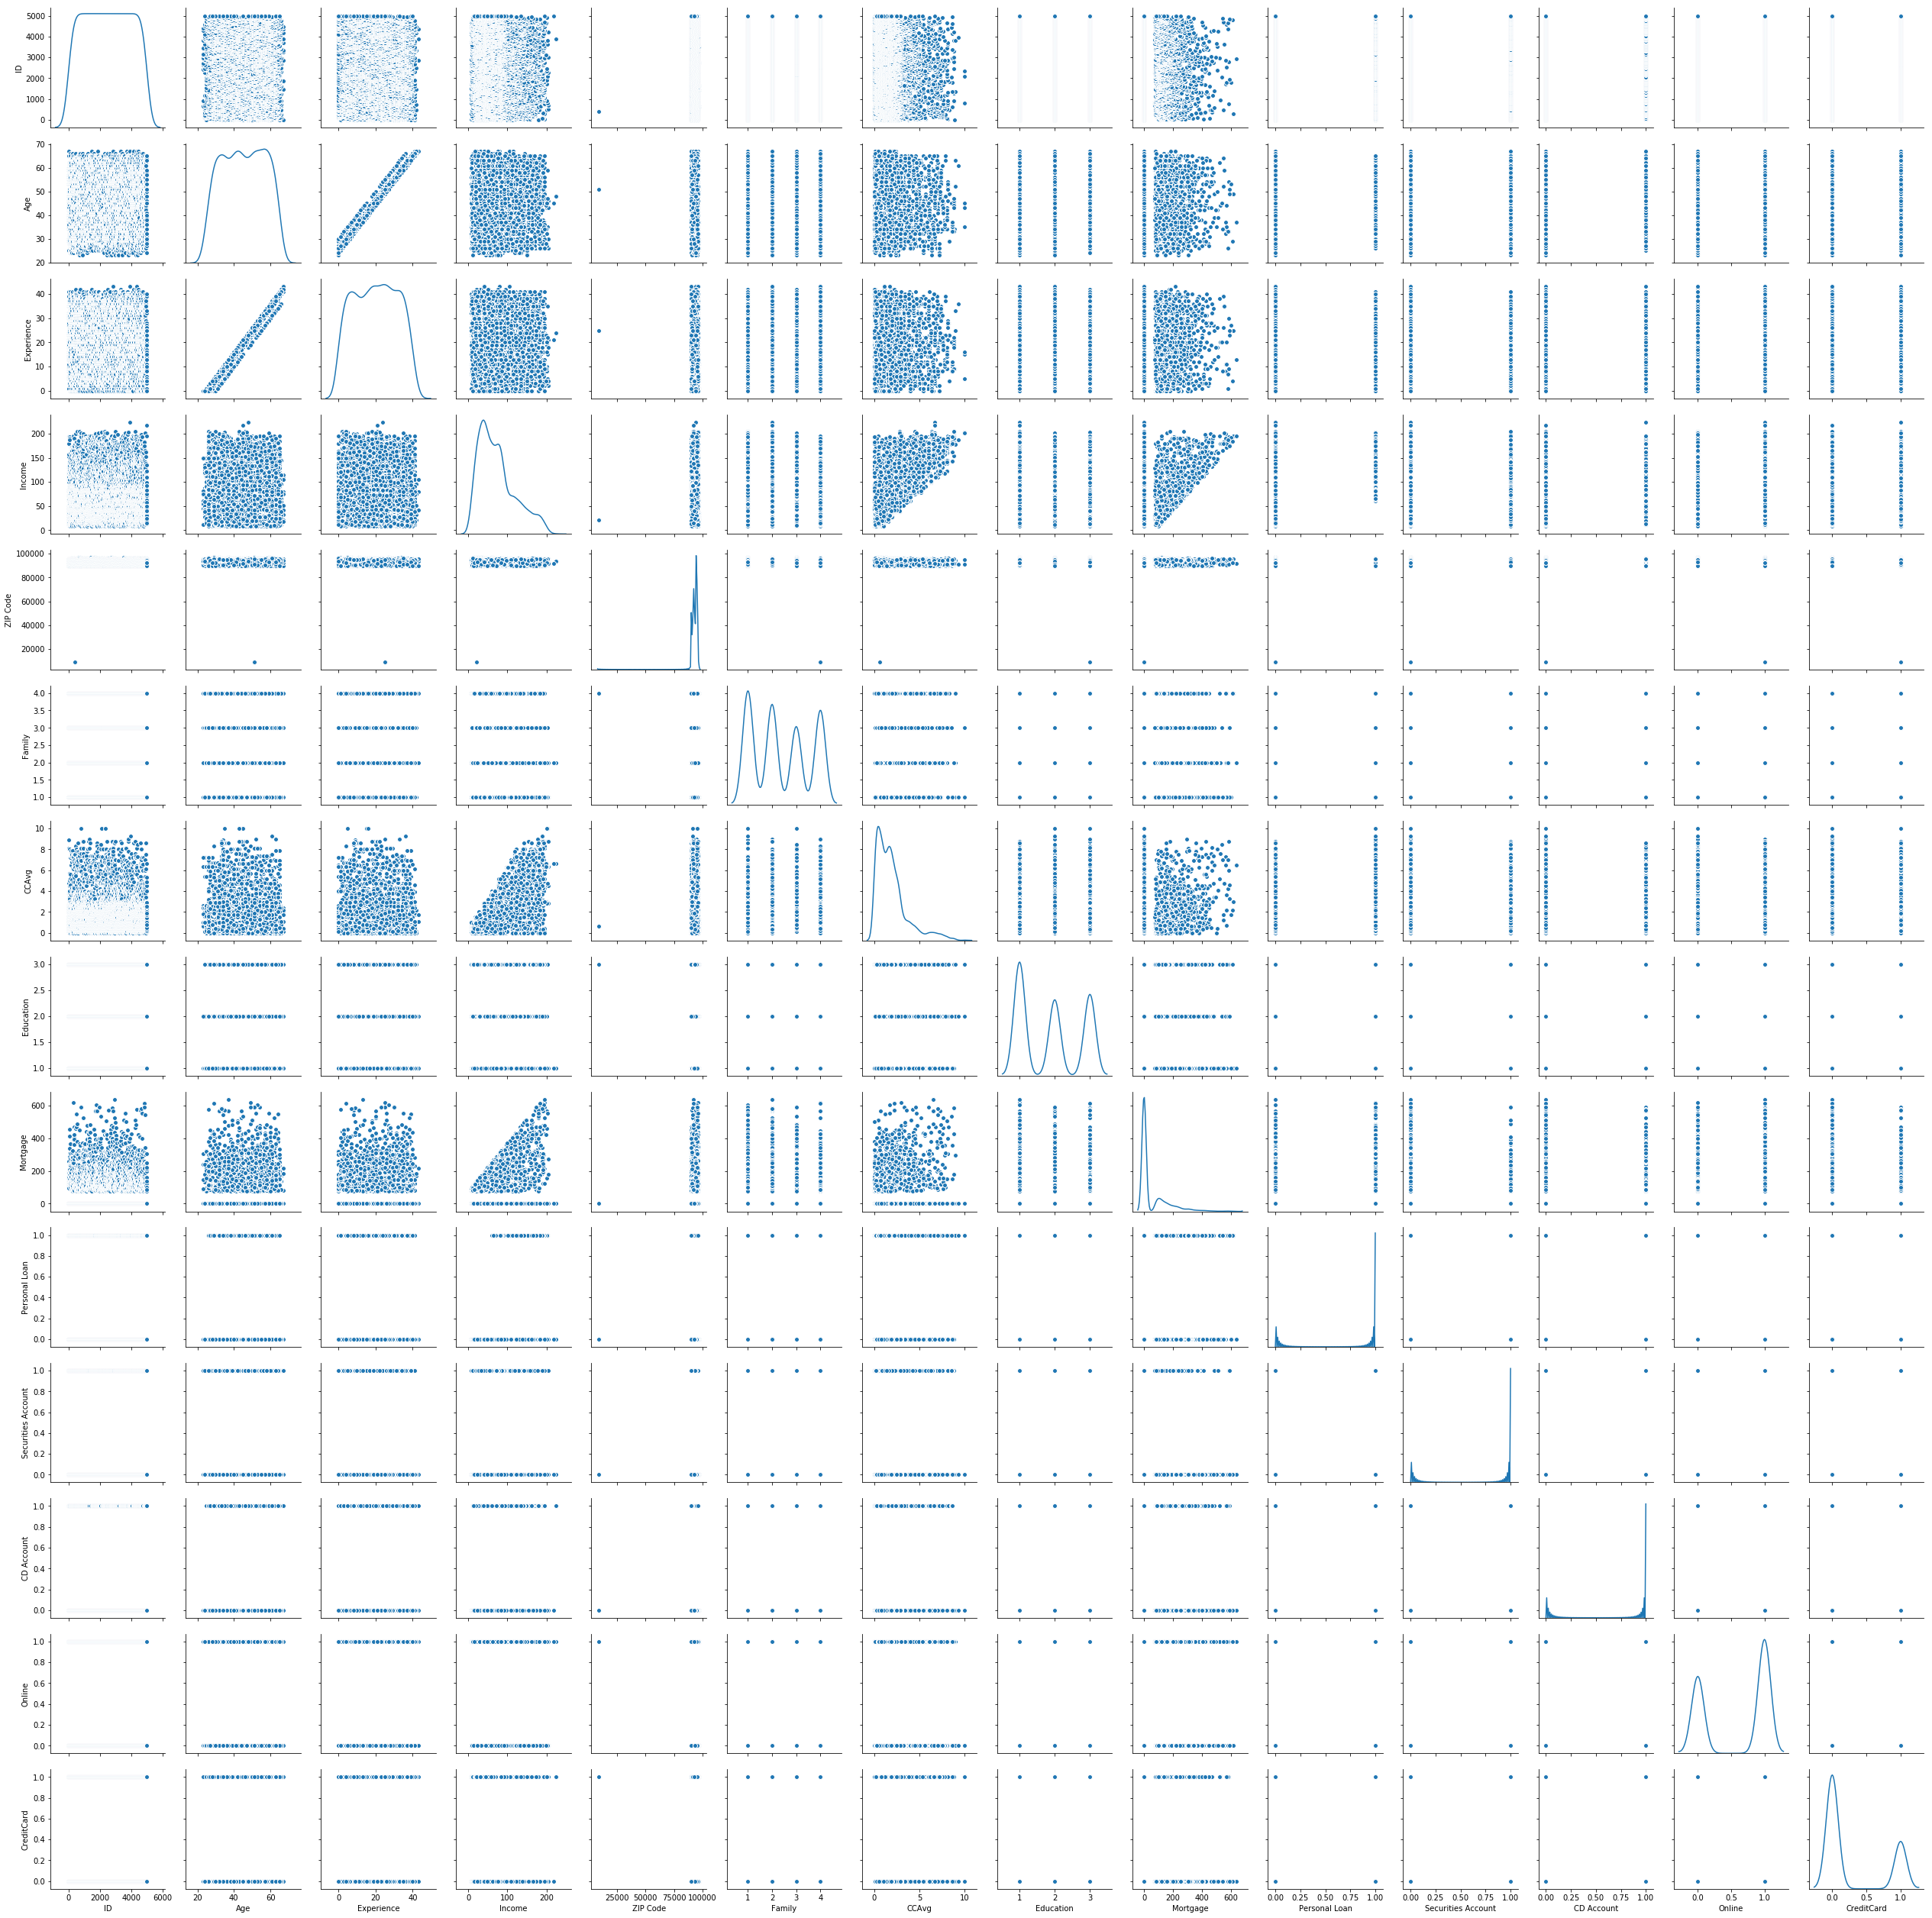

In [149]:
 sns.pairplot(bank,diag_kind='kde')

Age: mixture of gaussians. highly correlated with experience

Zip code : from zipcode distribution we can say that most of the customers are from around the same area

Income : almost 75% of the customers are from the income range of 0-100.the distribution is right skewed

more number of customers in the high income range has accepted the personal loan compared to the customers in the low income range. 

lower income ranged customers have more usage of online banking.

customers with higher mortage values are less in number 

customers with lower ccavg are more in number. the distribution is right skewed

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank.drop('Personal Loan',axis=1), 
                                                    bank['Personal Loan'], test_size=0.30, 
                                                    random_state=101)

In [151]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)

In [152]:
predictions = logmodel.predict(X_test)

In [153]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95      1354
          1       0.59      0.31      0.41       146

avg / total       0.90      0.91      0.90      1500



In [154]:
confusion_matrix(y_test,predictions)

array([[1323,   31],
       [ 101,   45]], dtype=int64)

KNN Modelling

In [165]:
#feature scaling 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [166]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [167]:
y_pred = classifier.predict(X_test)  

In [168]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[1343   11]
 [  67   79]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1354
          1       0.88      0.54      0.67       146

avg / total       0.95      0.95      0.94      1500



Naive bayes

In [163]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)  

In [164]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[1247  107]
 [  70   76]]
             precision    recall  f1-score   support

          0       0.95      0.92      0.93      1354
          1       0.42      0.52      0.46       146

avg / total       0.90      0.88      0.89      1500



actual 1 should not be predicted as 0 that means false negative is more costly in this case
because predicting the customers who acually buy the personal loan, as the customer who doesnot buy the personal loan 
might much affect the bussiness since it might lead in loosing the potential customers by not involving the actual
potential customers in the campign. Hence the metrics to be considered would be recall.

From the above models classification reports,in terms of recall we can see that knn(features scaled) has better recall than any remaining models. If scaling is not done, naive bayes would be the better model since it assumes independence among the predictors and recall is also better compared to other models.